### # 241,010,303       : 이유식

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

In [2]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

In [3]:
chunk = {}
for i in range(13):
    chunk[i] = pd.read_csv('./chunk/chunk{}.csv'.format(i))


In [5]:
len(chunk)

13

In [41]:
chunk[12].tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3321035,123321035,2018-09-28 17:00:21,"18,342,102","3,170","100,913,544","237,040,103",2
3321036,123321036,2018-09-28 17:00:21,"18,342,102","3,800","100,913,555","237,040,103",2
3321037,123321037,2018-09-28 17:00:22,"24,137,068","1,699,000","101,984,766","233,040,120",2
3321038,123321038,2018-09-28 17:00:25,"5,357,454","25,000","110,485,856","240,010,305",2
3321039,123321039,2018-09-28 17:00:27,"21,865,461","55,900","100,371,485","233,080,119",2


### #Chunk[12]내의 기저귀 거래 개수 확인

In [6]:
sum(chunk[12].old_admin_category_id == '241,010,303')

10965

### # 거래가 언제부터 이루어지는지?

In [9]:
chunk[0][chunk[0].old_admin_category_id == '241,010,303'].head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3410,3410,2018-01-01 00:04:44,"3,452,631","28,800","2,016,742","241,010,303",1
8880,8880,2018-01-01 00:10:09,"3,588,037","31,500","2,599,479","241,010,303",1
9733,9733,2018-01-01 00:10:58,"6,691,511","11,500","2,205,237","241,010,303",1
12399,12399,2018-01-01 00:13:31,"22,009,363","4,900","2,404,075","241,010,303",1
12415,12415,2018-01-01 00:13:32,"1,141,791","20,280","1,469,081","241,010,303",1


In [7]:
chunk[12][chunk[12].old_admin_category_id == '241,010,303'].tail() # 9월까지 거래 잘 이루어지네

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3317433,123317433,2018-09-28 16:45:10,"13,650,173","24,900","3,694,320","241,010,303",1
3319790,123319790,2018-09-28 16:54:31,"18,009,189","31,900","4,031,967","241,010,303",1
3319844,123319844,2018-09-28 16:54:46,"4,884,328","40,500","4,031,967","241,010,303",1
3320626,123320626,2018-09-28 16:57:56,"1,740,118","32,100","3,694,320","241,010,303",1
3320798,123320798,2018-09-28 16:58:35,"1,711,192","22,750","3,778,585","241,010,303",1


---

- 연습

In [52]:
y = pd.DataFrame()

In [57]:
x = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})

In [58]:
x

,a,b
0,1,4
1,2,5
2,3,6


In [59]:
pd.concat([y,x])

,a,b
0,1,4
1,2,5
2,3,6


---

### #기저귀 데이터 빼올거야

In [13]:
bbfood = pd.DataFrame()

In [14]:
for i in range(13):
  bbfood = pd.concat([bbfood, chunk[i][chunk[i].old_admin_category_id == '241,010,303']])

In [15]:
bbfood.shape  # 거래 총 25만건

(252629, 7)

In [16]:
bbfood.head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3410,3410,2018-01-01 00:04:44,"3,452,631","28,800","2,016,742","241,010,303",1
8880,8880,2018-01-01 00:10:09,"3,588,037","31,500","2,599,479","241,010,303",1
9733,9733,2018-01-01 00:10:58,"6,691,511","11,500","2,205,237","241,010,303",1
12399,12399,2018-01-01 00:13:31,"22,009,363","4,900","2,404,075","241,010,303",1
12415,12415,2018-01-01 00:13:32,"1,141,791","20,280","1,469,081","241,010,303",1


In [17]:
bbfood.tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3317433,123317433,2018-09-28 16:45:10,"13,650,173","24,900","3,694,320","241,010,303",1
3319790,123319790,2018-09-28 16:54:31,"18,009,189","31,900","4,031,967","241,010,303",1
3319844,123319844,2018-09-28 16:54:46,"4,884,328","40,500","4,031,967","241,010,303",1
3320626,123320626,2018-09-28 16:57:56,"1,740,118","32,100","3,694,320","241,010,303",1
3320798,123320798,2018-09-28 16:58:35,"1,711,192","22,750","3,778,585","241,010,303",1


### #filter 만들어주기

In [18]:
filter = pd.to_datetime('2018-08-01')

In [19]:
bbfood['biz_dt'] = pd.to_datetime(bbfood['biz_dt'])

### # filter이용하기

In [20]:
bbfood_train = bbfood[bbfood.biz_dt < filter]

In [21]:
bbfood_test = bbfood[bbfood.biz_dt >= filter]

In [22]:
bbfood_train.shape

(193645, 7)

In [23]:
bbfood_test.shape

(58984, 7)

In [24]:
bbfood_train.shape[0] + bbfood_test.shape[0] == bbfood.shape[0]

True

### # 저장

In [25]:
bbfood_train.to_excel('bbfood_train.xlsx')
bbfood_test.to_excel('bbfood_test.xlsx')

In [26]:
pd.read_excel('bbfood_train.xlsx').shape

(193645, 7)

In [27]:
pd.read_excel('bbfood_test.xlsx').shape

(58984, 7)

---

---

### # 데이터 로딩

In [3]:
bbfood_train = pd.read_excel('bbfood_train.xlsx')
#bbfood_test = pd.read_excel('bbfood_test.xlsx')

In [4]:
bbfood_test = pd.read_excel('bbfood_test.xlsx')

In [4]:
bbfood_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193645 entries, 3410 to 9110015
Data columns (total 7 columns):
Unnamed: 0               193645 non-null int64
biz_dt                   193645 non-null datetime64[ns]
m_id                     193645 non-null object
order_price              193645 non-null object
prod_no                  193645 non-null object
old_admin_category_id    193645 non-null object
serv_cd                  193645 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 11.8+ MB


### # 이런식의 계산을 원해

In [38]:
pd.to_datetime('2018-01-01') - pd.to_datetime('2018-01-02')

Timedelta('-1 days +00:00:00')

In [39]:
bbfood_train.shape[0]  # 전체 약 55만건의 구매이력 

545775

In [41]:
bbfood_train.m_id.nunique() # 이 기저귀 카테고리에 약 20만명의 구매이력이 있다..!

212550

---

- 연습

-이런식으로 timedelta 만들거야

In [44]:
a = bbfood.iloc[100000]['biz_dt'] - bbfood.iloc[0]['biz_dt']

In [45]:
a

Timedelta('51 days 12:21:43')

-t로써 쓸 것! 

In [46]:
a.days

51

---

- unique한 MEMBER ID불러와

In [5]:
mid = bbfood_train.m_id.unique()

In [6]:
len(mid)

65850

In [7]:
mid.shape

(65850,)

In [8]:
mid[1000]

'5,005,039'

### # 이런식으로 : 2번째 고객의 구매이력

In [9]:
bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[1]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8880,8880,2018-01-01 00:10:09,"3,588,037","31,500","2,599,479","241,010,303",1
6804304,6804304,2018-01-15 03:07:09,"3,588,037","31,500","2,599,479","241,010,303",1
709178,10709178,2018-01-24 08:24:30,"3,588,037","31,500","2,599,479","241,010,303",1
4146283,14146283,2018-02-01 07:03:00,"3,588,037","25,200","2,599,479","241,010,303",1
7860062,17860062,2018-02-07 17:13:16,"3,588,037","25,200","2,599,479","241,010,303",1
2592932,22592932,2018-02-21 10:58:40,"3,588,037","31,500","2,599,479","241,010,303",1
2594426,22594426,2018-02-21 11:02:32,"3,588,037","31,500","2,599,479","241,010,303",1
6598494,26598494,2018-03-02 15:04:40,"3,588,037","31,500","2,599,479","241,010,303",1
6599887,26599887,2018-03-02 15:08:25,"3,588,037","31,500","2,599,479","241,010,303",1
9583210,29583210,2018-03-08 00:05:12,"3,588,037","19,500","2,016,811","241,010,303",1


-> 이런식으로

---

In [11]:
bbfood_train.m_id.unique()[1] # 두번째 고객 정보

'3,588,037'

In [12]:
sum(bbfood_train.m_id == '3,588,037') #이 사람의 구매이력

19

---

(1) 테스트

In [20]:
import time

start_time = time.time()

c = {}
t = []
for i in range(len(bbfood_train.m_id.unique()[:100])):
    c[i] = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[i]].sort_values(by = 'biz_dt', ascending = False)
    for j in range(c[i].shape[0]-1):
        
        t.append((c[i].iloc[j]['biz_dt'] - c[i].iloc[j+1]['biz_dt']).days) #밑의 if문이랑 같은 결과야(해본결과, len가 1이면 iiappend안해줘)

        
elapsed_time = time.time() - start_time
print(elapsed_time)

3.9238269329071045


(2) 테스트

In [26]:
import time

start_time = time.time()

c = {}
t = np.array([])
for i in range(len(bbfood_train.m_id.unique()[:100])):
    c[i] = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[i]].sort_values(by = 'biz_dt', ascending = False)

    t = np.append(t, [j.days for j in c[i].biz_dt.diff()])
        
elapsed_time = time.time() - start_time
print(elapsed_time)

3.3005638122558594


In [27]:
t

array([  nan,  -31.,  -21.,  -10.,   -6.,  -14.,  -34.,  -17.,   -7.,
        -15.,   nan,  -38.,  -10.,  -26.,   -8.,  -11.,   -5.,  -10.,
         -8.,   -4.,   -6.,   -1.,  -10.,   -1.,  -14.,   -7.,   -8.,
        -10.,  -15.,   nan,   nan,  -15.,  -22.,   -1.,   -5., -108.,
         nan,   -5.,   -9.,  -22.,  -22.,  -14.,   nan,  -63.,   nan,
        -16.,  -16.,  -15.,   -1.,   -7.,  -10.,  -15.,  -14.,  -18.,
        -30.,  -12.,  -20.,    0.,  -30.,   nan,   nan,   -1.,   nan,
         nan,  -14.,  -12.,  -14.,  -19.,  -18.,  -12.,   -8.,  -14.,
         -8.,  -19.,  -13.,  -37.,   -7.,  -10.,   -5.,   -4.,   -2.,
         -4.,   nan,   nan,  -30.,  -92.,   nan,   -9.,    0.,   nan,
         nan,   nan,  -15.,  -27.,  -14.,  -27.,  -22.,  -16.,  -15.,
         -9.,  -12.,  -12.,  -25.,   nan,   nan,  -51.,  -13.,  -33.,
        -10.,   -7.,   -3.,   -1.,   -7.,  -11.,   -4.,   nan,   nan,
        -72.,  -80.,   nan,  -42.,  -29.,   nan,   nan,  -15.,   -6.,
        -11.,   -1.,

-> 시간 이정도 단축되었어! : (2)으로 한다!

---

# <U>**(2) 리스트 컴프리헨션, diff()메소드*</U>

In [15]:
cccc = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[13]]
    

In [17]:
cccc

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
53190,53190,2018-01-01 00:48:26,"10,913,678","25,000","2,599,479","241,010,303",1
53207,53207,2018-01-01 00:48:26,"10,913,678","18,900","2,016,742","241,010,303",1
4241800,4241800,2018-01-09 12:58:29,"10,913,678","25,800","2,210,482","241,010,303",1


In [16]:
np.array([j.days for j in cccc.biz_dt.diff()])

array([nan,  0.,  8.])

In [20]:
import time

start_time = time.time()

#c = {}
t = np.array([])
for i in range(len(bbfood_train.m_id.unique())):
    inter = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[i]]
    

    t = np.append(t, [j.days for j in inter.biz_dt.diff()])  # list comprehension에서 요소별로 빼와서 j.days로 처리할 수 있어.
        
#경과시간
elapsed_time = time.time() - start_time
hours, rem = divmod(elapsed_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:36:11.03


In [21]:
len(t)

193645

In [24]:
c = {}
for i in range(len(bbfood_train.m_id.unique()[:100])):
    c[i] = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[i]]

In [25]:
c[0]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3410,3410,2018-01-01 00:04:44,"3,452,631","28,800","2,016,742","241,010,303",1
7099294,7099294,2018-01-15 19:18:31,"3,452,631","19,500","3,095,180","241,010,303",1
9628504,9628504,2018-01-21 21:52:32,"3,452,631","28,800","2,016,742","241,010,303",1
7876292,17876292,2018-02-07 17:51:32,"3,452,631","20,100","3,095,180","241,010,303",1
1933838,31933838,2018-03-13 09:56:11,"3,452,631","36,000","2,016,811","241,010,303",1
7766596,37766596,2018-03-26 12:59:30,"3,452,631","36,000","2,016,811","241,010,303",1
195949,40195949,2018-04-01 03:52:40,"3,452,631","18,900","2,016,742","241,010,303",1
5548873,45548873,2018-04-10 13:09:51,"3,452,631","36,000","2,016,811","241,010,303",1
5097777,55097777,2018-05-01 00:47:32,"3,452,631","15,900","2,016,811","241,010,303",1
9603413,69603413,2018-05-31 23:24:58,"3,452,631","15,900","2,016,811","241,010,303",1


In [26]:
c[50]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
202492,202492,2018-01-01 06:24:46,"1,447,263","18,500","2,016,742","241,010,303",1
2433314,2433314,2018-01-04 23:34:43,"1,447,263","18,500","2,016,742","241,010,303",1
4465819,4465819,2018-01-09 22:02:44,"1,447,263","19,500","2,016,811","241,010,303",1
5457874,5457874,2018-01-11 22:34:10,"1,447,263","11,200","2,279,152","241,010,303",1
7181623,7181623,2018-01-15 22:15:54,"1,447,263","6,900","2,279,152","241,010,303",1
8045794,8045794,2018-01-17 17:25:55,"1,447,263","9,500","3,176,317","241,010,303",1
67912,10067912,2018-01-22 21:44:50,"1,447,263","15,150","2,279,152","241,010,303",1
3477031,13477031,2018-01-30 19:48:43,"1,447,263","13,800","2,279,152","241,010,303",1
6369957,16369957,2018-02-04 23:00:42,"1,447,263","14,650","2,279,152","241,010,303",1
1339460,21339460,2018-02-18 20:41:21,"1,447,263","22,550","2,279,152","241,010,303",1


In [28]:
c[99]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
277914,277914,2018-01-01 10:39:53,"10,536,551","20,400","2,182,222","241,010,303",1


---

In [22]:
t

array([nan, 14.,  6., ..., nan, nan, nan])

In [29]:
tt = pd.DataFrame(t)

In [30]:
tt.head(20)

,0
0,NaN
1,14.0
2,6.0
3,16.0
4,33.0
5,13.0
6,5.0
7,9.0
8,20.0
9,30.0


In [31]:
tt.to_excel('bbfood_t_1012.xlsx')

In [32]:
tt.to_csv('bbfood_t_1012.csv')

In [36]:
tt.count()

0    127795
dtype: int64

In [38]:
len(tt)-tt.count()  # 19만개 중, 6만5천개가 distinct user : datetime.diff() 메소드 이용하면, 첫번째 obs는 nan이 되니깐 맞아!

0    65850
dtype: int64

In [41]:
bbfood_train.shape

(193645, 7)

In [40]:
bbfood_train.m_id.unique().shape

(65850,)

- 확인!

In [42]:
bbfood_train.m_id.nunique()

65850

---

### # t (interval) 불러올거야

In [3]:
tt = pd.read_csv('bbfood_t_1012.csv')

In [4]:
tt.shape

(193645, 2)

In [5]:
tt = tt.dropna()  # t값 순수하게 얻은거야

In [9]:
# nan값 제거하고 얻은 shape

tt.shape

(127795, 2)

In [10]:
tt = tt.iloc[:,1:]

In [12]:
tt.head()

,0
1,14.0
2,6.0
3,16.0
4,33.0
5,13.0


In [16]:
# time 으로 column명 변경
tt.columns = ['time']

In [18]:
tt.head(5)

,time
1,14.0
2,6.0
3,16.0
4,33.0
5,13.0


In [19]:
tt.time.value_counts()

0.0      18423
7.0       6008
6.0       5743
13.0      5272
8.0       5054
10.0      4637
11.0      4628
14.0      4627
9.0       4616
12.0      4562
5.0       4030
4.0       3113
15.0      2907
3.0       2686
16.0      2641
17.0      2544
1.0       2279
2.0       2264
20.0      2259
18.0      2183
19.0      2109
21.0      2093
27.0      1770
22.0      1537
28.0      1520
23.0      1381
26.0      1241
24.0      1234
25.0      1105
35.0      1015
         ...  
186.0        5
176.0        5
179.0        4
184.0        4
191.0        4
180.0        4
166.0        4
175.0        4
185.0        3
187.0        3
194.0        3
195.0        3
181.0        3
198.0        2
183.0        2
172.0        2
190.0        2
188.0        2
192.0        2
182.0        2
197.0        1
203.0        1
196.0        1
207.0        1
204.0        1
199.0        1
206.0        1
193.0        1
205.0        1
201.0        1
Name: time, Length: 205, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1099a5780>]],
      dtype=object)

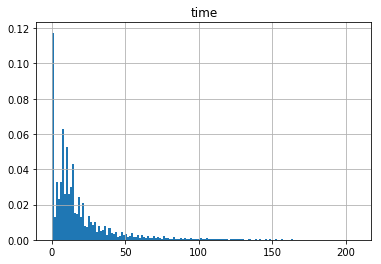

In [20]:
# time=0 인 값이 너무 많아보여서, histogram으로 다시 한번.

pd.DataFrame(tt).hist(bins=150, density = True)

In [21]:
tmean = tt.mean()

In [22]:
tmean

time    18.494432
dtype: float64

# # drop 0 value

In [23]:
tt_drop0 = tt[(tt[['time']] != 0).all(axis=1)]

In [25]:
tt_drop0.head()

,time
1,14.0
2,6.0
3,16.0
4,33.0
5,13.0


In [26]:
tt_drop0.time.value_counts()

7.0      6008
6.0      5743
13.0     5272
8.0      5054
10.0     4637
11.0     4628
14.0     4627
9.0      4616
12.0     4562
5.0      4030
4.0      3113
15.0     2907
3.0      2686
16.0     2641
17.0     2544
1.0      2279
2.0      2264
20.0     2259
18.0     2183
19.0     2109
21.0     2093
27.0     1770
22.0     1537
28.0     1520
23.0     1381
26.0     1241
24.0     1234
25.0     1105
35.0     1015
29.0      989
         ... 
186.0       5
171.0       5
184.0       4
179.0       4
191.0       4
175.0       4
180.0       4
166.0       4
195.0       3
187.0       3
194.0       3
181.0       3
185.0       3
182.0       2
172.0       2
183.0       2
198.0       2
190.0       2
188.0       2
192.0       2
205.0       1
206.0       1
203.0       1
196.0       1
207.0       1
204.0       1
193.0       1
197.0       1
201.0       1
199.0       1
Name: time, Length: 204, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b335c88>]],
      dtype=object)

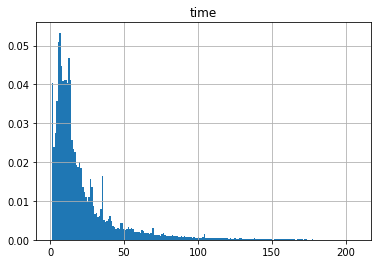

In [27]:
tt_drop0.hist(bins=200, density = True)

# 2. 파라미터 추정

### # (1) gamma.fit으로 parameters 추정해볼게.

In [32]:
stats.gamma.fit(tt_drop0)

(0.9752616465168948, 0.9999999999999956, 20.573177920777216)

In [33]:
alpha, loc0, scale = stats.gamma.fit(tt_drop0, loc=0)

In [34]:
alpha, loc0, scale

(0.8829582410358849, 0.9999999999999998, 22.828111994341413)

---

: 추정된 parameters로 분포 확인해볼게

In [35]:
y = stats.gamma.rvs(a = alpha , scale=scale , size = tt_drop0.shape[0])

In [48]:
y

array([22.82822501,  6.36287198, 98.93806278, ..., 93.11046289,
       25.23990425,  0.5640729 ])

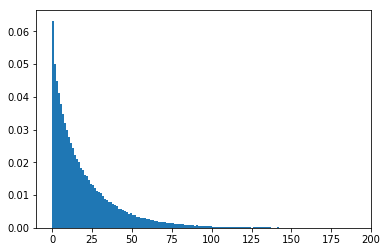

In [36]:
plt.figure(figsize = (6,4))
plt.hist(y, density=True, bins = 200)
plt.xlim(-10,200)
plt.show()

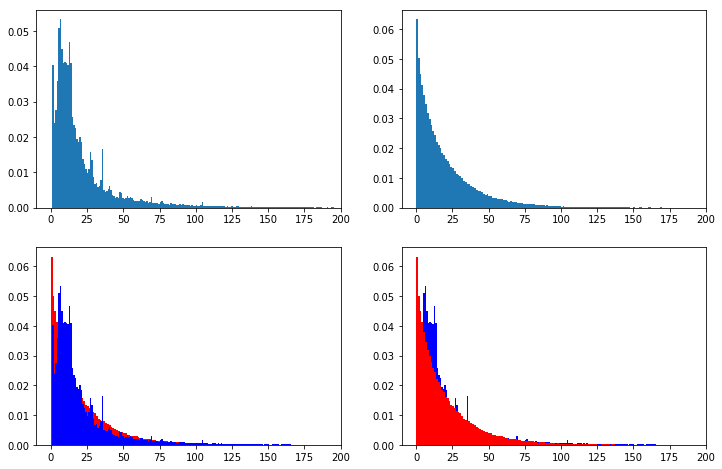

In [47]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.hist(tt_drop0.time, density=True, bins = 200)
plt.xlim(-10,200)

plt.subplot(2,2,2)
plt.hist(y, density=True, bins = 200)
plt.xlim(-10,200)

plt.subplot(2,2,3)

plt.hist(y, density=True, bins = 200, color='red')
plt.hist(tt_drop0.time, density=True, bins = 200, color = 'blue')
plt.xlim(-10,200)

plt.subplot(2,2,4)
plt.hist(tt_drop0.time, density=True, bins = 200, color = 'blue')
plt.hist(y, density=True, bins = 200, color='red')
plt.xlim(-10,200)


plt.show()
plt.close()

# - 별로 안맞아보인다!

---

---

In [39]:
import scipy.special as special

In [41]:
special.digamma(3, out=None) 

0.9227843350984671

### # (2) MLE

- https://en.wikipedia.org/wiki/Gamma_distribution#Maximum_likelihood_estimation

In [37]:
# s값 계산
s = np.log(tt_drop0.time.mean()) - np.log(tt_drop0.time).mean()

In [38]:
s

0.43790588832320054

In [45]:
# k값 계산

k_ = (3-s+np.sqrt((s-3)**2+24*s))/(12*s)

In [46]:
k_

1.2738985255704063

In [ ]:
# update k : 음... 아직 못했어

def updat(k, s):
    u = (np.log(k)-special.digamma(k)-s)/(1/k - special.digamma(special.digamma))

In [49]:
theta_ = tt_drop0.time.mean()/k_

In [50]:
theta_

16.96343827638159

In [51]:
theta_, k_

(16.96343827638159, 1.2738985255704063)

In [52]:
theta_*k_

21.6096990088871

In [54]:
y = stats.gamma.rvs(a = k_ , scale=theta_ , size = tt_drop0.shape[0])

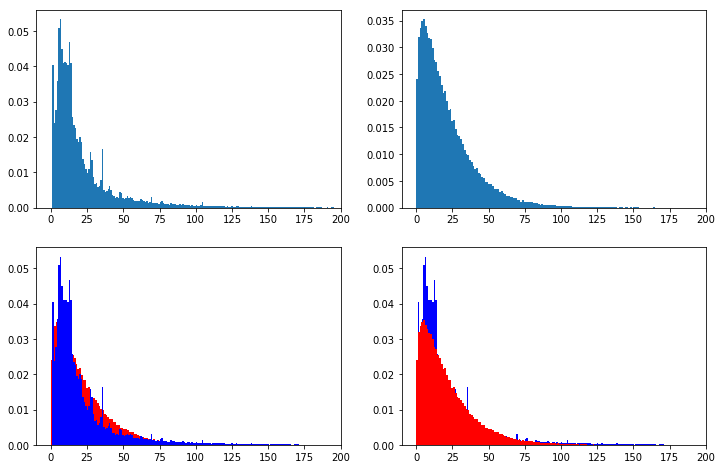

In [55]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.hist(tt_drop0.time, density=True, bins = 200)
plt.xlim(-10,200)

plt.subplot(2,2,2)
plt.hist(y, density=True, bins = 200)
plt.xlim(-10,200)

plt.subplot(2,2,3)

plt.hist(y, density=True, bins = 200, color='red')
plt.hist(tt_drop0.time, density=True, bins = 200, color = 'blue')
plt.xlim(-10,200)

plt.subplot(2,2,4)
plt.hist(tt_drop0.time, density=True, bins = 200, color = 'blue')
plt.hist(y, density=True, bins = 200, color='red')
plt.xlim(-10,200)


plt.show()
plt.close()

In [56]:
y.mean()

21.67705678720969

### # (3) 1/t로 감마분포 추정해야하지않울까? -> poisson 분포와의 관계

In [57]:
1/tt_drop0[:10]

,time
1,0.071429
2,0.166667
3,0.062500
4,0.030303
5,0.076923
6,0.200000
7,0.111111
8,0.050000
9,0.033333
11,0.071429


In [58]:
tt_inver = 1/tt_drop0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e0c2b38>]],
      dtype=object)

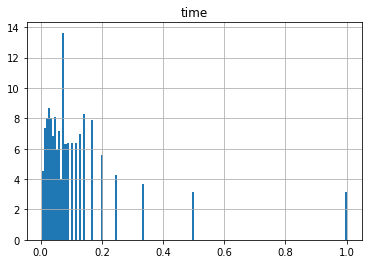

In [62]:
tt_inver.hist(bins=150, density = True)

In [61]:
tt_inver.time.value_counts()

0.142857    6008
0.166667    5743
0.076923    5272
0.125000    5054
0.100000    4637
0.090909    4628
0.071429    4627
0.111111    4616
0.083333    4562
0.200000    4030
0.250000    3113
0.066667    2907
0.333333    2686
0.062500    2641
0.058824    2544
1.000000    2279
0.500000    2264
0.050000    2259
0.055556    2183
0.052632    2109
0.047619    2093
0.037037    1770
0.045455    1537
0.035714    1520
0.043478    1381
0.038462    1241
0.041667    1234
0.040000    1105
0.028571    1015
0.034483     989
            ... 
0.005682       5
0.005376       5
0.005435       4
0.005236       4
0.005556       4
0.006024       4
0.005587       4
0.005714       4
0.005525       3
0.005348       3
0.005405       3
0.005128       3
0.005155       3
0.005464       2
0.005208       2
0.005263       2
0.005319       2
0.005814       2
0.005051       2
0.005495       2
0.005102       1
0.005181       1
0.004975       1
0.004878       1
0.004926       1
0.005025       1
0.004854       1
0.004902      

In [292]:
tt_inver.shape

(109372, 1)

In [63]:
stats.gamma.fit(tt_inver, loc=0)

(1.0251383646862091, 0.004830890237049062, 0.1084977910814053)

In [64]:
aaa = 1.0251383646862091

In [65]:
bbb = 1/0.1084977910814053

In [66]:
aaa/bbb

0.11122524812125778

: 음..이게 맞는걸까? - 뒤에서 테스트 해보자!

### # (4) sample mean, variance로 alpha, beta 그냥 써볼까?

In [69]:
tt_drop0.mean()

time    21.609699
dtype: float64

In [70]:
tt_drop0.var()

time    559.288064
dtype: float64

####  a 와 b를 간단히 이렇게 정할 수 있어.

In [71]:
b = tt_drop0.mean()/tt_drop0.var()

In [72]:
a = b*tt_drop0.mean()

In [75]:
print(a)
print(b)

time    0.834953
dtype: float64
time    0.038638
dtype: float64


In [76]:
a/b

time    21.609699
dtype: float64

In [ ]:
y = stats.gamma.pdf(x, a=a, scale=1/b)

In [77]:
r = stats.gamma.rvs(a,scale=1/b , size = tt_drop0.shape[0])  # scale = 1/rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e4e9828>]],
      dtype=object)

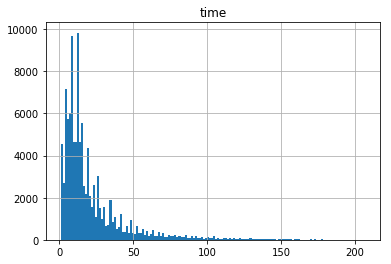

In [86]:
tt_drop0.hist(bins = 150)

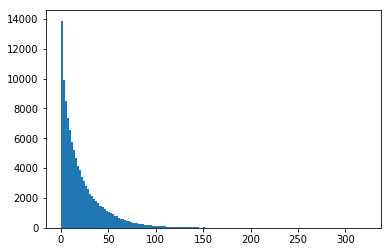

In [88]:
plt.figure()
plt.hist(r,  bins = 150)
plt.show()

# 각각의 방법들 estimate 비교

In [90]:
# 1. stats.fit()
print(alpha, 1/scale)

0.8829582410358849 0.043805637551098314


In [92]:
# 2. mle 계산..?
print(k_, 1/theta_)

1.2738985255704063 0.05895031323881507


In [101]:
# 3. 데이터 mean, var
print(a.values, b.values)

[0.83495272] [0.03863787]


: 결국에는, mle 손계산을 한번 찾아봐야 할 것 같다.

---

---

# 3. MPG

In [210]:
test_id = bbfood_test.m_id.unique()[:30]

### # t_ : elapsed time interval(the last purchase  by the customer and the current time:

In [121]:
bbfood_test[bbfood_test.m_id == test_id[0]].iloc[0].biz_dt    # test_data에서 첫 구매

Timestamp('2018-08-01 00:00:31')

In [122]:
bbfood_train[bbfood_train.m_id == test_id[0]].iloc[-1].biz_dt  

Timestamp('2018-07-13 23:12:00')

---

In [123]:
current = pd.to_datetime('2018-08-01')

In [124]:
t_ = (current - bbfood_train[bbfood_train.m_id == test_id[0]].iloc[-1].biz_dt).days

In [125]:
t_

18

### #  t_purch : elapsed time between first and last purcahse time 

In [126]:
t_purch = (bbfood_train[bbfood_train.m_id == test_id[0]].iloc[-1].biz_dt - bbfood_train[bbfood_train.m_id == test_id[0]].iloc[0].biz_dt).days

### # aggregation t_mean

In [144]:
tmean = tt_drop0.time.mean()

In [145]:
tmean

21.6096990088871

### # user's  t_mean

In [129]:
tmean_user = bbfood_train.biz_dt[bbfood_train.m_id == test_id[0]].diff().mean().days

In [130]:
tmean_user

4

In [132]:
theta_, k_

(16.963438276425805, 1.2738985255670858)

In [133]:
current

Timestamp('2018-08-01 00:00:00')

In [134]:
(k+k_)/(t_purch+2*abs(tmean_user-tmean)+(1/theta_))

time    0.124813
dtype: float64

- current가 7월17일이라면?

In [156]:
current = pd.to_datetime('2018-07-17')

---

In [136]:
def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days  # 구매이력이 없는사람은?
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days
    k = train.biz_dt[train.m_id == test_id].shape[0]
    if k <= 1 :
        tmean_u = tmean
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, tmean_u, k

In [138]:
b=1/theta_

In [140]:
theta_

16.963438276425805

In [139]:
b

0.05895031323866142

In [141]:
k_

1.2738985255670858

In [143]:
tmean

time    21.609699
dtype: float64

In [176]:
current = pd.to_datetime('2018-07-18')

In [177]:
f_lamb,_,__ = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[0], alpha = k_, beta=1/theta_, tmean=tmean, current=current)

In [178]:
(1-stats.poisson.pmf(mu = f_lamb, k=0))

0.27053795892119714

In [179]:
stats.poisson.pmf(mu = f_lamb, k=0)

0.7294620410788029

In [180]:
current = pd.to_datetime('2018-08-01')

In [181]:
f_lamb,_,__ = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[0], alpha = k_, beta=1/theta_, tmean=tmean, current=current)

In [182]:
(1-stats.poisson.pmf(mu = f_lamb, k=0))

0.13277844478049783

In [183]:
current_l = pd.date_range(current, periods=30).tolist()

In [186]:
bbfood_train[bbfood_train.m_id == test_id[7]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
1377128,51377128,2018-04-23 00:34:21,"16,577,539","20,340","1,659,313","241,010,303",1
2539464,62539464,2018-05-16 00:22:10,"16,577,539","26,500","3,653,074","241,010,303",1
2083169,82083169,2018-06-27 19:52:33,"16,577,539","25,000","2,886,735","241,010,303",1
4539894,94539894,2018-07-22 01:05:41,"16,577,539","27,590","2,886,735","241,010,303",1


In [189]:
1-stats.poisson.pmf(mu = lamb, k=0)

0.048510003067078644

In [200]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[7], 
              alpha = k_ , beta=1/theta_, tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,')


SyntaxError: EOL while scanning string literal (<ipython-input-200-5c36d90c7a2d>, line 4)

---

---

In [191]:
bbfood_train[bbfood_train.m_id == test_id[8]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
4882791,94882791,2018-07-22 21:59:46,"20,348,231","20,300","3,849,094","241,010,303",1
4889322,94889322,2018-07-22 22:10:47,"20,348,231","25,000","3,838,653","241,010,303",1


In [194]:
bbfood_test[bbfood_test.m_id == test_id[8]][:1]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9117865,99117865,2018-08-01 00:09:07,"20,348,231","31,080","3,848,355","241,010,303",1


In [190]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[8], 
              alpha = k_ , beta=1/theta_, tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k)


current: 2018-08-01 00:00:00 , pred: 0.16580619629084803 , tmean_u: 0 , k: 2
current: 2018-08-02 00:00:00 , pred: 0.15059047799733416 , tmean_u: 0 , k: 2
current: 2018-08-03 00:00:00 , pred: 0.13792747845432696 , tmean_u: 0 , k: 2
current: 2018-08-04 00:00:00 , pred: 0.12722561653116615 , tmean_u: 0 , k: 2
current: 2018-08-05 00:00:00 , pred: 0.11806270612672454 , tmean_u: 0 , k: 2
current: 2018-08-06 00:00:00 , pred: 0.1101294661755644 , tmean_u: 0 , k: 2
current: 2018-08-07 00:00:00 , pred: 0.10319419112827699 , tmean_u: 0 , k: 2
current: 2018-08-08 00:00:00 , pred: 0.09707989025606756 , tmean_u: 0 , k: 2
current: 2018-08-09 00:00:00 , pred: 0.09164905282229452 , tmean_u: 0 , k: 2
current: 2018-08-10 00:00:00 , pred: 0.08679323054721677 , tmean_u: 0 , k: 2
current: 2018-08-11 00:00:00 , pred: 0.08242575074345049 , tmean_u: 0 , k: 2
current: 2018-08-12 00:00:00 , pred: 0.07847651567425706 , tmean_u: 0 , k: 2
current: 2018-08-13 00:00:00 , pred: 0.07488822350701496 , tmean_u: 0 , k: 2


In [207]:
bbfood_train[bbfood_train.m_id == test_id[6]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
7818602,77818602,2018-06-17 23:28:38,"6,009,922","35,800","1,657,530","241,010,303",1
9527974,89527974,2018-07-11 12:57:57,"6,009,922","32,720","1,657,530","241,010,303",1
4823402,94823402,2018-07-22 19:52:14,"6,009,922","42,760","1,657,530","241,010,303",1


In [208]:
bbfood_test[bbfood_test.m_id == test_id[6]][:1]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9116842,99116842,2018-08-01 00:07:54,"6,009,922","32,320","1,657,530","241,010,303",1


In [209]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[6], 
              alpha = k_ , beta=1/theta_, tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k)


current: 2018-08-01 00:00:00 , pred: 0.08183421421315595 , tmean_u: 17 , k: 3
current: 2018-08-02 00:00:00 , pred: 0.08509069100247868 , tmean_u: 17 , k: 3
current: 2018-08-03 00:00:00 , pred: 0.0886168806694475 , tmean_u: 17 , k: 3
current: 2018-08-04 00:00:00 , pred: 0.09244770873096742 , tmean_u: 17 , k: 3
current: 2018-08-05 00:00:00 , pred: 0.09662439658483668 , tmean_u: 17 , k: 3
current: 2018-08-06 00:00:00 , pred: 0.10119594542300936 , tmean_u: 17 , k: 3
current: 2018-08-07 00:00:00 , pred: 0.10622106001752385 , tmean_u: 17 , k: 3
current: 2018-08-08 00:00:00 , pred: 0.11177067215152592 , tmean_u: 17 , k: 3
current: 2018-08-09 00:00:00 , pred: 0.1179312932870189 , tmean_u: 17 , k: 3
current: 2018-08-10 00:00:00 , pred: 0.11177067215152592 , tmean_u: 17 , k: 3
current: 2018-08-11 00:00:00 , pred: 0.10622106001752385 , tmean_u: 17 , k: 3
current: 2018-08-12 00:00:00 , pred: 0.10119594542300936 , tmean_u: 17 , k: 3
current: 2018-08-13 00:00:00 , pred: 0.09662439658483668 , tmean_u

In [215]:
current = pd.to_datetime('2018-07-20')

In [216]:
current_l = pd.date_range(current, periods=30).tolist()

In [217]:
bbfood_train[bbfood_train.m_id == test_id[10]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
1495129,1495129,2018-01-02 23:52:33,"1,558,980","18,060","2,210,482","241,010,303",1
4520637,4520637,2018-01-09 23:31:24,"1,558,980","20,280","1,469,081","241,010,303",1
1074065,11074065,2018-01-24 23:22:00,"1,558,980","20,280","1,657,529","241,010,303",1
7466415,17466415,2018-02-06 22:52:38,"1,558,980","29,000","3,255,617","241,010,303",1
2428054,22428054,2018-02-20 23:20:42,"1,558,980","23,660","1,657,529","241,010,303",1
4916814,24916814,2018-02-26 23:50:06,"1,558,980","13,300","3,335,544","241,010,303",1
2379159,52379159,2018-04-24 22:10:23,"1,558,980","30,420","1,657,529","241,010,303",1
1656291,81656291,2018-06-26 21:55:25,"1,558,980","27,120","1,659,313","241,010,303",1
9415838,89415838,2018-07-11 08:57:15,"1,558,980","27,120","1,659,313","241,010,303",1


In [218]:
bbfood_test[bbfood_test.m_id == test_id[10]][:1]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9118170,99118170,2018-08-01 00:09:29,"1,558,980","24,540","3,694,320","241,010,303",1


In [219]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[10], 
              alpha = k_ , beta=1/theta_, tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k)


current: 2018-07-20 00:00:00 , pred: 0.045817335934007164 , tmean_u: 23 , k: 9
current: 2018-07-21 00:00:00 , pred: 0.04622958934115218 , tmean_u: 23 , k: 9
current: 2018-07-22 00:00:00 , pred: 0.0466493273636055 , tmean_u: 23 , k: 9
current: 2018-07-23 00:00:00 , pred: 0.04707675565581715 , tmean_u: 23 , k: 9
current: 2018-07-24 00:00:00 , pred: 0.047512087474612996 , tmean_u: 23 , k: 9
current: 2018-07-25 00:00:00 , pred: 0.04795554403368618 , tmean_u: 23 , k: 9
current: 2018-07-26 00:00:00 , pred: 0.04840735487810688 , tmean_u: 23 , k: 9
current: 2018-07-27 00:00:00 , pred: 0.04886775828018053 , tmean_u: 23 , k: 9
current: 2018-07-28 00:00:00 , pred: 0.04933700165808785 , tmean_u: 23 , k: 9
current: 2018-07-29 00:00:00 , pred: 0.049815342018850406 , tmean_u: 23 , k: 9
current: 2018-07-30 00:00:00 , pred: 0.05030304642728689 , tmean_u: 23 , k: 9
current: 2018-07-31 00:00:00 , pred: 0.050800392502755365 , tmean_u: 23 , k: 9
current: 2018-08-01 00:00:00 , pred: 0.05130766894562244 , tm

In [258]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[10], 
              alpha = k_ , beta=1/theta_, tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', pred:',(1-stats.poisson.pmf(mu = 1/lamb, k=0)),', tmean_u:',tmean_u,', k:',k)


current: 2018-07-20 00:00:00 , pred: 0.9999999994504336 , tmean_u: 23 , k: 9
current: 2018-07-21 00:00:00 , pred: 0.9999999993323276 , tmean_u: 23 , k: 9
current: 2018-07-22 00:00:00 , pred: 0.9999999991888397 , tmean_u: 23 , k: 9
current: 2018-07-23 00:00:00 , pred: 0.9999999990145152 , tmean_u: 23 , k: 9
current: 2018-07-24 00:00:00 , pred: 0.9999999988027269 , tmean_u: 23 , k: 9
current: 2018-07-25 00:00:00 , pred: 0.9999999985454238 , tmean_u: 23 , k: 9
current: 2018-07-26 00:00:00 , pred: 0.9999999982328241 , tmean_u: 23 , k: 9
current: 2018-07-27 00:00:00 , pred: 0.9999999978530446 , tmean_u: 23 , k: 9
current: 2018-07-28 00:00:00 , pred: 0.9999999973916474 , tmean_u: 23 , k: 9
current: 2018-07-29 00:00:00 , pred: 0.9999999968310924 , tmean_u: 23 , k: 9
current: 2018-07-30 00:00:00 , pred: 0.99999999615007 , tmean_u: 23 , k: 9
current: 2018-07-31 00:00:00 , pred: 0.9999999953226906 , tmean_u: 23 , k: 9
current: 2018-08-01 00:00:00 , pred: 0.999999994317501 , tmean_u: 23 , k: 9
cu

In [220]:
bbfood_train[bbfood_train.m_id == test_id[11]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
7497108,37497108,2018-03-25 23:24:38,"3,663,364","21,500","1,454,013","241,010,303",1
3716727,43716727,2018-04-06 10:06:21,"3,663,364","21,200","1,454,013","241,010,303",1
8228742,48228742,2018-04-16 08:04:31,"3,663,364","23,850","1,454,013","241,010,303",1
6068384,66068384,2018-05-23 23:40:02,"3,663,364","25,800","3,653,074","241,010,303",1
8001558,78001558,2018-06-18 11:21:03,"3,663,364","31,800","3,653,074","241,010,303",1
6529245,96529245,2018-07-25 22:12:44,"3,663,364","30,550","3,653,074","241,010,303",1


In [221]:
bbfood_test[bbfood_test.m_id == test_id[11]][:1]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9118767,99118767,2018-08-01 00:10:16,"3,663,364","31,800","3,653,074","241,010,303",1


In [223]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[11], 
              alpha = k_ , beta=1/theta_, tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', lamb:',lamb,', pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k)


current: 2018-07-20 00:00:00 , lamb: 0.04017420024242366 , pred: 0.039377916023815906 , tmean_u: 24 , k: 6
current: 2018-07-21 00:00:00 , lamb: 0.04062292620861686 , pred: 0.03980887539803246 , tmean_u: 24 , k: 6
current: 2018-07-22 00:00:00 , lamb: 0.04108178949834889 , pred: 0.04024937078492863 , tmean_u: 24 , k: 6
current: 2018-07-23 00:00:00 , lamb: 0.041551137559957166 , pred: 0.04069972218833173 , tmean_u: 24 , k: 6
current: 2018-07-24 00:00:00 , lamb: 0.04203133390328121 , pred: 0.04116026408976847 , tmean_u: 24 , k: 6
current: 2018-07-25 00:00:00 , lamb: 0.04252275903860812 , pred: 0.04163134627645082 , tmean_u: 24 , k: 6
current: 2018-07-26 00:00:00 , lamb: 0.04302581148226544 , pred: 0.04211333472673273 , tmean_u: 24 , k: 6
current: 2018-07-27 00:00:00 , lamb: 0.0435409088344467 , pred: 0.04260661255774578 , tmean_u: 24 , k: 6
current: 2018-07-28 00:00:00 , lamb: 0.044068488935396305 , pred: 0.04311158104036683 , tmean_u: 24 , k: 6
current: 2018-07-29 00:00:00 , lamb: 0.04460

In [280]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[11], 
              alpha = aaa , beta=bbb, tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', lamb:',lamb,', pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k)


current: 2018-07-20 00:00:00 , lamb: 0.036932275148879846 , pred: 0.036258597618076926 , tmean_u: 24 , k: 6
current: 2018-07-21 00:00:00 , lamb: 0.03732471917686483 , pred: 0.03663673797164857 , tmean_u: 24 , k: 6
current: 2018-07-22 00:00:00 , lamb: 0.03772559303664578 , pred: 0.03702284772504483 , tmean_u: 24 , k: 6
current: 2018-07-23 00:00:00 , lamb: 0.038135171290569626 , pred: 0.03741718146486728 , tmean_u: 24 , k: 6
current: 2018-07-24 00:00:00 , lamb: 0.03855374055530018 , pred: 0.0378200047368622 , tmean_u: 24 , k: 6
current: 2018-07-25 00:00:00 , lamb: 0.038981600170696844 , pred: 0.038231594641949695 , tmean_u: 24 , k: 6
current: 2018-07-26 00:00:00 , lamb: 0.03941906291373144 , pred: 0.038652240471574006 , tmean_u: 24 , k: 6
current: 2018-07-27 00:00:00 , lamb: 0.03986645576102133 , pred: 0.03908224438543495 , tmean_u: 24 , k: 6
current: 2018-07-28 00:00:00 , lamb: 0.04032412070388551 , pred: 0.039521922134934995 , tmean_u: 24 , k: 6
current: 2018-07-29 00:00:00 , lamb: 0.0

In [283]:
for i in range(30):
    lamb, tmean_u, k = func_lamb(train = bbfood_train, test = bbfood_test, test_id=test_id[6], 
              alpha = aaa , beta=bbb , tmean=tmean, current=current_l[i])
    print('current:',current_l[i], ', pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k)


current: 2018-07-20 00:00:00 , pred: 0.04721815270643248 , tmean_u: 17 , k: 3
current: 2018-07-21 00:00:00 , pred: 0.048352351064031796 , tmean_u: 17 , k: 3
current: 2018-07-22 00:00:00 , pred: 0.0495423659219294 , tmean_u: 17 , k: 3
current: 2018-07-23 00:00:00 , pred: 0.050792420504436 , tmean_u: 17 , k: 3
current: 2018-07-24 00:00:00 , pred: 0.05210717500066331 , tmean_u: 17 , k: 3
current: 2018-07-25 00:00:00 , pred: 0.05349178456334647 , tmean_u: 17 , k: 3
current: 2018-07-26 00:00:00 , pred: 0.0549519667946019 , tmean_u: 17 , k: 3
current: 2018-07-27 00:00:00 , pred: 0.056494080579163386 , tmean_u: 17 , k: 3
current: 2018-07-28 00:00:00 , pred: 0.05812521855451214 , tmean_u: 17 , k: 3
current: 2018-07-29 00:00:00 , pred: 0.059853316050661576 , tmean_u: 17 , k: 3
current: 2018-07-30 00:00:00 , pred: 0.061687280025143676 , tmean_u: 17 , k: 3
current: 2018-07-31 00:00:00 , pred: 0.06363714240805851 , tmean_u: 17 , k: 3
current: 2018-08-01 00:00:00 , pred: 0.06571424342181986 , tmean

In [225]:
theta_

16.963438276425805

In [226]:
k_

1.2738985255670858

In [227]:
theta_*k_

21.6096990088871

In [228]:
beta_ = 1/theta_

In [229]:
k_*(1/beta_)

21.6096990088871

In [236]:
1- stats.poisson.pmf(mu = 1, k=0)

0.6321205588285577

0.0591090571392966

In [251]:
stats.poisson.pmf(mu = 20, k=0)

2.061153622438558e-09

In [240]:
1- stats.poisson.pmf(mu = 20, k=0) # 아무튼 단위시간당 사건이 일어날 확률이 거의 1에 가깝네...? 말이 되나?

0.9999999979388464

In [241]:
1- stats.poisson.pmf(mu = 1/20, k=0)  #이게 말이 되는거지..?

0.048770575499285984

In [243]:
k_

1.2738985255670858

In [244]:
theta_

16.963438276425805

In [245]:
k_/theta_

0.07509671711644865

In [246]:
beta = 1/theta_

In [247]:
alpha = k_

In [248]:
lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)

In [250]:
alpha/beta

21.6096990088871

In [249]:
lamb

0.20747622106701746

In [252]:
x = stats.gamma.rvs(20, loc=0, size=100, random_state=None)

In [253]:
x

array([23.5760263 , 16.79882503, 19.12220772, 19.6395567 , 17.61916019,
       27.08435867, 24.07462043, 19.71430796, 22.31903569, 17.18404996,
       20.62257784, 18.73149908, 15.43085059, 17.63149464, 15.61024759,
       27.50204993, 18.0613278 , 17.3420513 , 13.7758441 , 18.11009584,
       18.58872054, 20.77143485, 23.43289182, 16.76418682, 20.64271669,
       20.86453934, 24.83158898, 19.12729593, 14.15622028, 19.47954688,
       20.54984017, 25.44677277, 23.71662871, 20.78748684, 17.2684207 ,
       10.24324051, 26.29502449, 15.38169909, 15.26890634, 16.57085832,
       21.45590068, 22.45434661, 23.26607   , 18.80753039, 23.63279692,
       22.88442576, 18.24663889, 13.84441865, 14.69325164, 25.07329484,
       11.27295747, 21.49711261, 12.53884877, 19.25815085, 18.70516594,
       13.73849767, 24.6867474 , 22.0666507 , 22.44825184, 19.24877916,
       23.32874855, 20.01723892, 26.14793179, 26.61979644, 11.93340922,
       28.20949427, 22.34678392, 24.71970967, 22.14044551, 15.36

In [261]:
stats.expon.rvs(loc=0, scale=1/20, size=100, random_state=None)

array([5.26384771e-02, 2.43942226e-02, 1.60938492e-02, 2.39678247e-03,
       6.73799286e-02, 9.51200078e-02, 4.06699755e-02, 3.54215096e-04,
       5.66261943e-03, 6.27072490e-03, 1.74688499e-03, 1.97374858e-02,
       9.14836003e-02, 2.05559917e-02, 2.54021668e-02, 9.62384461e-02,
       1.96400422e-03, 6.50010529e-02, 9.17846120e-04, 7.57281860e-02,
       6.50674199e-03, 2.53492546e-02, 1.69957805e-02, 2.01299981e-01,
       2.43322944e-02, 4.39161980e-02, 3.68655612e-02, 7.23330032e-02,
       2.68554131e-02, 2.29238581e-02, 5.84658838e-02, 6.68724234e-04,
       1.41937265e-02, 5.03866730e-02, 9.12737533e-02, 1.96826738e-02,
       5.41070451e-03, 2.54969367e-02, 1.84505643e-02, 1.46153556e-02,
       2.84307862e-01, 6.73919760e-02, 9.32791065e-02, 6.67424793e-02,
       7.49627660e-02, 1.47158847e-01, 1.61475096e-02, 1.73896841e-01,
       1.54019843e-01, 9.31356537e-04, 5.65401264e-02, 6.25147003e-02,
       5.63604183e-02, 4.85486440e-02, 7.98399671e-02, 4.62967466e-02,
      